## Observations and Insights 

1. Ramicane is the most effective treatment, as the tumor volume after this treatment is the smallest. The results also vary the least. 

2. Ketapril is the least effective treatment, as the tumor volume after this treatment is the largest. The results also vary the most. 

3. The tumor volume is less predictable for mice which weigh over 24 grams and have had the Capomulin treatment.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice_count_combined = len(combined_data["Mouse ID"].unique())
print(f"The total number of mice is: {mice_count_combined}")

The total number of mice is: 249


# REMOVE ALL MICE WHICH HAVE A DUPLICATE

In [3]:
#amending homework based on feedback "look into pandas duplicated methods to find duplicate records in the data sets"
duplicates = combined_data.loc[combined_data.duplicated(subset = ["Mouse ID","Timepoint"], keep = False),"Mouse ID"]
duplicates

908    g989
909    g989
910    g989
911    g989
912    g989
913    g989
914    g989
915    g989
916    g989
917    g989
Name: Mouse ID, dtype: object

In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[combined_data["Mouse ID"].isin(duplicates)==False]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
#Check the number of mice in clean dataframe
mice_count_clean = len(clean_data["Mouse ID"].unique())
print(f"The total number of mice is: {mice_count_clean}")

The total number of mice is: 248


## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = clean_data[["Drug Regimen", "Tumor Volume (mm3)"]].groupby(["Drug Regimen"]).mean().rename(columns={"Tumor Volume (mm3)":"Mean"})
median = clean_data[["Drug Regimen", "Tumor Volume (mm3)"]].groupby(["Drug Regimen"]).median().rename(columns={"Tumor Volume (mm3)":"Median"})
stddev = clean_data[["Drug Regimen", "Tumor Volume (mm3)"]].groupby(["Drug Regimen"]).std().rename(columns={"Tumor Volume (mm3)":"Standard Deviation"})
variance = clean_data[["Drug Regimen", "Tumor Volume (mm3)"]].groupby(["Drug Regimen"]).var().rename(columns={"Tumor Volume (mm3)":"Variance"})
sem = clean_data[["Drug Regimen", "Tumor Volume (mm3)"]].groupby(["Drug Regimen"]).sem().rename(columns={"Tumor Volume (mm3)":"SEM"})
dataframes = [mean, median, variance, stddev, sem]
# This method is the most straighforward, creating multiple series and putting them all together at the end.
from functools import reduce
sum_stat = reduce(lambda left,right: pd.merge(left, right, on = ["Drug Regimen"], how = "inner"), dataframes)
sum_stat

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
sum_data = clean_data.groupby("Drug Regimen")
sum_data_mean = sum_data["Tumor Volume (mm3)"].mean()
sum_data_median = sum_data["Tumor Volume (mm3)"].median()
sum_data_variance = sum_data["Tumor Volume (mm3)"].var()
sum_data_stdev = sum_data["Tumor Volume (mm3)"].std()
sum_data_sem = sum_data["Tumor Volume (mm3)"].sem()

sum_stat_summary = pd.DataFrame({
    "Mean":sum_data_mean,
    "Median":sum_data_median,
    "Variance":sum_data_variance,
    "Standard Deviation":sum_data_stdev,
    "SEM":sum_data_sem
})
sum_stat_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

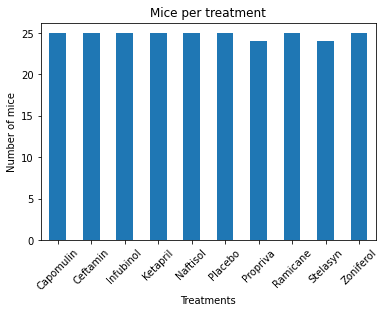

In [8]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mouse_per_drug = clean_data[["Drug Regimen", "Mouse ID"]].drop_duplicates(subset = ["Mouse ID"]).groupby("Drug Regimen").count()
mouse_per_drug.plot(kind = "bar", title = "Mice per treatment", xlabel = "Treatments", ylabel = "Number of mice", rot = 45, legend = False)
plt.show()

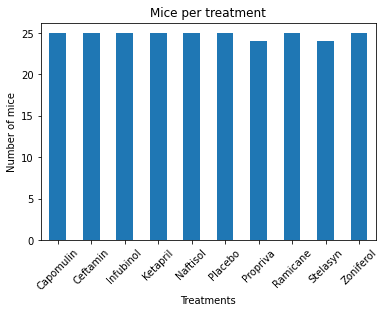

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plt.bar(mouse_per_drug.index, mouse_per_drug["Mouse ID"], width = 0.5)
plt.xlabel("Treatments")
plt.ylabel("Number of mice")
plt.title("Mice per treatment")
plt.xticks(rotation = 45)
plt.xlim(-0.5,9.5)
plt.show()

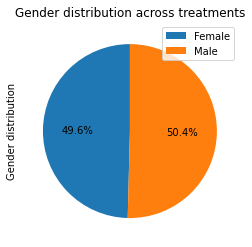

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender = clean_data.drop_duplicates(subset = ["Mouse ID"])
mice_gender = mice_gender[["Sex", "Mouse ID"]].groupby("Sex").count()
mice_gender.plot(kind = "pie", y = "Mouse ID", autopct = '%1.1f%%', ylabel = "Gender distribution", labels = None, title = "Gender distribution across treatments", startangle = 90)
plt.show()

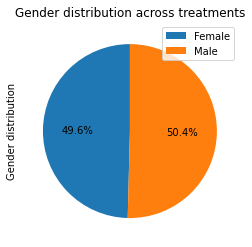

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mice_gender["Mouse ID"], autopct = '%1.1f%%', startangle = 90)
plt.ylabel("Gender distribution")
plt.legend(labels = ["Female", "Male"])
plt.title("Gender distribution across treatments")
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = clean_data[(clean_data["Drug Regimen"] == "Capomulin") | (clean_data["Drug Regimen"] == "Ramicane")| (clean_data["Drug Regimen"] == "Infubinol")| (clean_data["Drug Regimen"] == "Ceftamin")].sort_values(["Mouse ID", "Timepoint"])
treatments = treatments.drop_duplicates(subset = ["Drug Regimen", "Mouse ID"], keep = "last")

In [13]:
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
lowerq = {}
upperq = {}
iqr = {}
lower_bound = {}
upper_bound = {}
lower_outlier = {}
upper_outlier = {}

for drug in drugs:
    quartiles = treatments["Tumor Volume (mm3)"].loc[treatments["Drug Regimen"]== drug].quantile([0.25, 0.5, 0.75])
    lowerq[drug] = quartiles[0.25]
    upperq[drug] = quartiles[0.75]
    iqr[drug] = upperq[drug] - lowerq[drug]
    lower_bound[drug] = lowerq[drug] - (1.5*iqr[drug])
    upper_bound[drug] = upperq[drug] + (1.5*iqr[drug])
    lower_outlier[drug] = len(treatments.loc[(treatments["Drug Regimen"]== drug) & (treatments["Tumor Volume (mm3)"] < lower_bound[drug])])
    upper_outlier[drug] = len(treatments.loc[(treatments["Drug Regimen"]== drug) & (treatments["Tumor Volume (mm3)"] > upper_bound[drug])])
    
outlier_dfs = pd.DataFrame({
    "Lower quartile": lowerq,
    "Upper quartile": upperq,
    "IQR": iqr,
    "Lower bound": lower_bound,
    "Upper bound": upper_bound,
    "Lower outliers": lower_outlier,
    "Upper outliers": upper_outlier
})
outlier_dfs

,Lower quartile,Upper quartile,IQR,Lower bound,Upper bound,Lower outliers,Upper outliers
Capomulin,32.377357,40.159220,7.781863,20.704562,51.832015,0,0
Ramicane,31.560470,40.659006,9.098537,17.912664,54.306811,0,0
Infubinol,54.048608,65.525743,11.477135,36.832905,82.741446,1,0
Ceftamin,48.722078,64.299830,15.577752,25.355450,87.666458,0,0


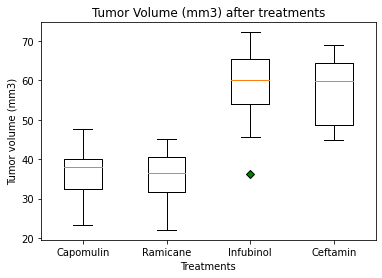

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
capomulin = treatments["Tumor Volume (mm3)"].loc[treatments["Drug Regimen"]=="Capomulin"]
ramicane = treatments["Tumor Volume (mm3)"].loc[treatments["Drug Regimen"]=="Ramicane"]
infubinol = treatments["Tumor Volume (mm3)"].loc[treatments["Drug Regimen"]=="Infubinol"]
ceftamin = treatments["Tumor Volume (mm3)"].loc[treatments["Drug Regimen"]=="Ceftamin"]
data = [capomulin, ramicane, infubinol, ceftamin]

green_diamond = dict(markerfacecolor = "g", marker = "D")
fig1, ax1 = plt.subplots()
ax1.boxplot(data, labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"], flierprops = green_diamond)
plt.title("Tumor Volume (mm3) after treatments")
plt.ylabel("Tumor volume (mm3)")
plt.xlabel("Treatments")
plt.show()

## Line and Scatter Plots

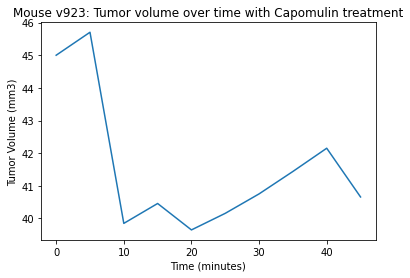

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_mouse = clean_data.loc[clean_data["Drug Regimen"]== "Capomulin"].groupby("Mouse ID").count()
#selected Mouse ID: v923

mouse = clean_data.loc[clean_data["Mouse ID"]== "v923"].sort_values("Timepoint")
plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"])
plt.title("Mouse v923: Tumor volume over time with Capomulin treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (minutes)")
plt.show()

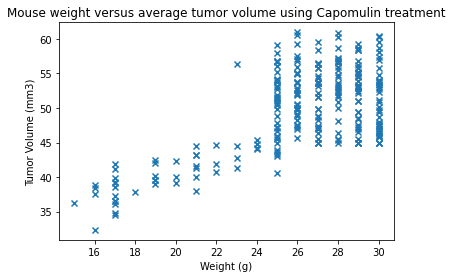

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_weight_vol = clean_data[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]].groupby("Mouse ID").mean()
plt.scatter(capomulin_weight_vol["Weight (g)"], capomulin_weight_vol["Tumor Volume (mm3)"], marker = "x")
plt.title("Mouse weight versus average tumor volume using Capomulin treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.show()

## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(capomulin_weight_vol["Weight (g)"], capomulin_weight_vol["Tumor Volume (mm3)"])
regress_values = capomulin_weight_vol["Weight (g)"]*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The correlation coefficient is {rvalue}")
print(f"The linear regression model is {line_eq}")

The correlation coefficient is 0.6595577594236609
The linear regression model is y = 1.1x + 21.01


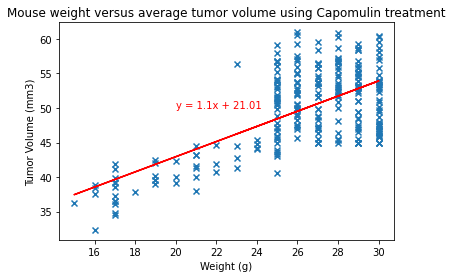

In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen, including linear regression model
plt.scatter(capomulin_weight_vol["Weight (g)"], capomulin_weight_vol["Tumor Volume (mm3)"], marker = "x")
plt.title("Mouse weight versus average tumor volume using Capomulin treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.plot(capomulin_weight_vol["Weight (g)"], regress_values, "r-")
plt.annotate(line_eq, (20, 50), color = "red")
plt.show()